In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("test.xlsx", sheet_name="Arkusz1")
df = pd.read_excel("test.xlsx")
df = df[['Year', 'Married', 'Income', "Mean age", "Household"]]
df

,Year,Married,Income,Mean age,Household
0,2022,136297,42330,29.15,131202
1,2021,135704,40860,29.45,129224
2,2020,137772,38760,29.30,128451
3,2019,137758,35700,28.90,128579
4,2018,136506,34640,28.80,127586
5,2017,135749,34060,28.45,126224
6,2016,134145,32790,28.45,125819
7,2015,133564,31300,28.15,124587
8,2014,132585,29860,28.15,123229
9,2013,131656,29750,27.80,122459


In [6]:
df.describe()

,Year,Married,Income,Mean age,Household
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,130663.173913,29424.347826,27.493478,119526.086957
std,6.78233,4969.723969,5971.686853,1.174086,7576.810008
min,2000.00000,120211.000000,22130.000000,25.950000,104705.000000
25%,2005.50000,127473.000000,25355.000000,26.425000,113863.500000
50%,2011.00000,130767.000000,28070.000000,27.400000,119927.000000
75%,2016.50000,134924.500000,33425.000000,28.450000,126021.500000
max,2022.00000,137772.000000,42330.000000,29.450000,131202.000000


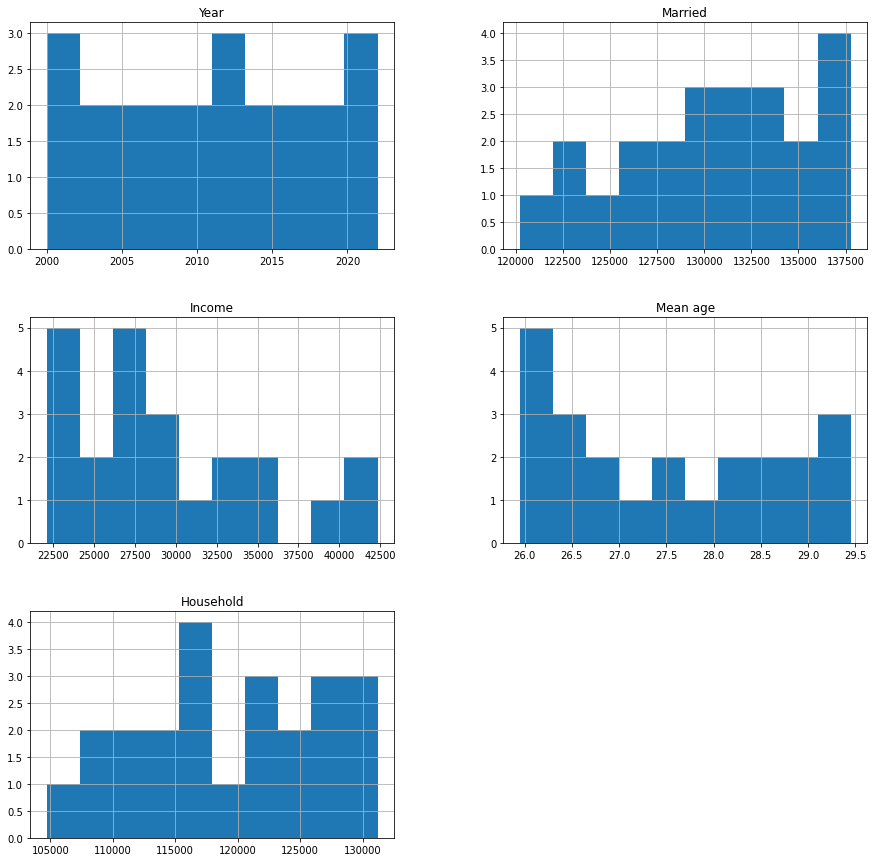

In [7]:
df.hist(figsize=(15,15), bins=10)
plt.show()

# Income na małżeństwa

In [8]:
import warnings
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import scipy.stats as stats

import matplotlib.pyplot as plt

In [37]:
# model = CmdStanModel(stan_file='model_1_prior.stan')
model = CmdStanModel(stan_file='model_adam_1_prior.stan')
N = 23
R=100

data = {"alpha" : np.log(df["Married"].mean()),
        "income" : df["Income"].mean() / 100000}
# data = {'N': N, 'income': df['Income']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1)

INFO:cmdstanpy:compiling stan file /home/DA_project/model_adam_1_prior.stan to exe file /home/DA_project/model_adam_1_prior
INFO:cmdstanpy:compiled model executable: /home/DA_project/model_adam_1_prior
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


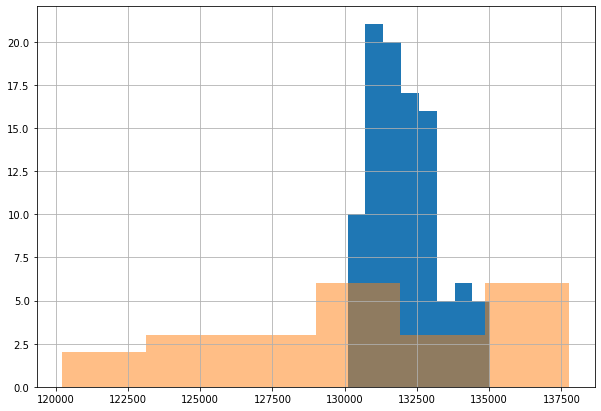

In [38]:
new_df = gen_1.draws_pd()
plt.figure(figsize=(10, 7))
plt.hist(new_df["y_sim"], bins="auto")
plt.hist(df['Married'], bins="auto", alpha=0.5)
plt.grid()
plt.show()